# In this Notebook we are going to make a classification model for pizza and steak images

## Get the data

The data we are working with from the food101 dataset (101 classes of food)
https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [1]:
# first manually download pizza_1 and Steak_1 photos from the repositorie and upload to the colab
link = "https://github.com/prvpitawala/ML_project_5_CNN_Pizza_Steak_Classification"

In [2]:
# Let's Downolad the dataset using this link
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-27 07:41:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   167MB/s    in 0.6s    

2023-08-27 07:41:54 (167 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [3]:
# you can see pizza steak folder
# let's chekout the data set
!ls pizza_steak/

test  train


In [4]:
# there is two folders inside the pizza steak file
!ls pizza_steak/train/

pizza  steak


In [5]:
# let's go inside the steak folder
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

There we can see more steak images inside the folder.

In [6]:
# lets wolk through pizza steak dirrectory and list number of files
import os

for dirpath, dirnames, filenames in os.walk("/content/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/pizza_steak
There are 2 directories and 0 images in /content/pizza_steak/train
There are 0 directories and 750 images in /content/pizza_steak/train/steak
There are 0 directories and 750 images in /content/pizza_steak/train/pizza
There are 2 directories and 0 images in /content/pizza_steak/test
There are 0 directories and 250 images in /content/pizza_steak/test/steak
There are 0 directories and 250 images in /content/pizza_steak/test/pizza


Let's consider only one image after this

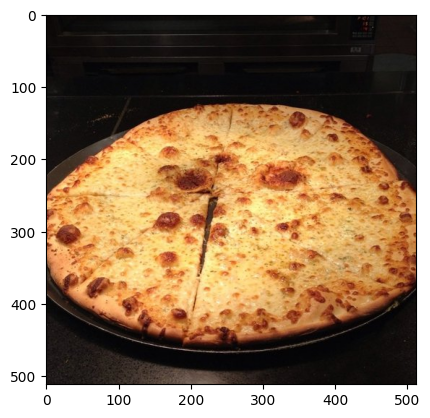

In [7]:
# let's visualize the image inside the folders
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_dir = "pizza_1.jpg"
img = mpimg.imread(image_dir)
plt.imshow(img)

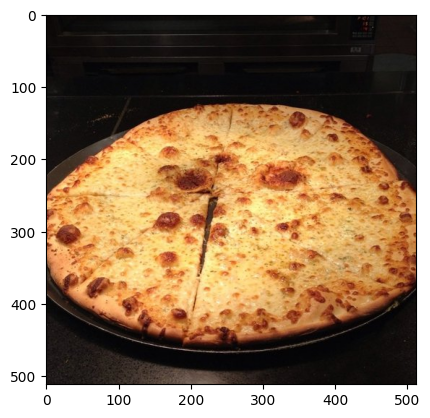

In [8]:
image_dir = "/content/pizza_1.jpg"
img = mpimg.imread(image_dir)
plt.imshow(img)

In [9]:
#  matplotlib.image is help to change our image to array.
# let's see our one image and how is this array type
img

array([[[11,  7,  6],
        [12,  8,  7],
        [12,  8,  7],
        ...,
        [26, 21, 18],
        [27, 22, 19],
        [28, 23, 20]],

       [[11,  7,  6],
        [12,  8,  7],
        [12,  8,  7],
        ...,
        [28, 23, 20],
        [28, 23, 20],
        [28, 23, 20]],

       [[11,  7,  6],
        [12,  8,  7],
        [13,  9,  8],
        ...,
        [30, 25, 22],
        [29, 24, 21],
        [28, 23, 20]],

       ...,

       [[26, 20, 20],
        [30, 24, 24],
        [26, 20, 20],
        ...,
        [19, 15, 14],
        [22, 18, 17],
        [25, 21, 20]],

       [[30, 24, 24],
        [31, 25, 25],
        [27, 21, 21],
        ...,
        [18, 14, 13],
        [19, 15, 14],
        [21, 17, 16]],

       [[33, 27, 27],
        [34, 28, 28],
        [29, 23, 23],
        ...,
        [18, 14, 13],
        [17, 13, 12],
        [17, 13, 12]]], dtype=uint8)

In [10]:
# lets see the array shape of our image
img.shape

(512, 512, 3)

This is 512*512 pixel image.   3 mean it has RGB (red green blue) values ( 3 colour channels )
so the array is 3 dimentional array.

before feed to the neural network we want to normalize our image. so we the highest pixel value is "255" for the jpg image.
and the minimum value is "0"


In [11]:
# lets normalize our data
img/255

array([[[0.04313725, 0.02745098, 0.02352941],
        [0.04705882, 0.03137255, 0.02745098],
        [0.04705882, 0.03137255, 0.02745098],
        ...,
        [0.10196078, 0.08235294, 0.07058824],
        [0.10588235, 0.08627451, 0.0745098 ],
        [0.10980392, 0.09019608, 0.07843137]],

       [[0.04313725, 0.02745098, 0.02352941],
        [0.04705882, 0.03137255, 0.02745098],
        [0.04705882, 0.03137255, 0.02745098],
        ...,
        [0.10980392, 0.09019608, 0.07843137],
        [0.10980392, 0.09019608, 0.07843137],
        [0.10980392, 0.09019608, 0.07843137]],

       [[0.04313725, 0.02745098, 0.02352941],
        [0.04705882, 0.03137255, 0.02745098],
        [0.05098039, 0.03529412, 0.03137255],
        ...,
        [0.11764706, 0.09803922, 0.08627451],
        [0.11372549, 0.09411765, 0.08235294],
        [0.10980392, 0.09019608, 0.07843137]],

       ...,

       [[0.10196078, 0.07843137, 0.07843137],
        [0.11764706, 0.09411765, 0.09411765],
        [0.10196078, 0

You can see now our image array has 0-1 values only. we did that becuse our neural network is most like to work with the 0 t 1 values.

In [12]:
# now we are going to make the neral network for do the classification task

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the random seed
tf.random.set_seed(42)

# pre-prcess the data (get all the pixel values between the 0 and 1 also call scaling or normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)  # this is built in part
valid_datagen = ImageDataGenerator(rescale = 1./255)

# set up paths to our model directories
train_dir = "/content/pizza_steak/train"
test_dir  = "/content/pizza_steak/test"

# Import data from directories and make it to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory= test_dir,
                                               batch_size = 32,
                                               target_size=(224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation ="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# fit the model
history = model.fit(train_data,
                    epochs = 5,
                    steps_per_epoch= len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 73s 2s/step - loss: 0.5650 - accuracy: 0.6873 - val_loss: 0.4263 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 72s 2s/step - loss: 0.4247 - accuracy: 0.8153 - val_loss: 0.3430 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 75s 2s/step - loss: 0.3848 - accuracy: 0.8380 - val_loss: 0.3564 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 72s 2s/step - loss: 0.3635 - accuracy: 0.8520 - val_loss: 0.3563 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 73s 2s/step - loss: 0.2843 - accuracy: 0.8973 - val_loss: 0.3281 - val_accuracy: 0.8640


In [13]:
# lets evaluate the model
model.evaluate(valid_data)

16/16 [==============================] - 8s 509ms/step - loss: 0.3281 - accuracy: 0.8640


[0.3280505836009979, 0.8640000224113464]

we can see our model validation accuracy is 0.87. It mean our model is working well. but it can improve it more than this using diffrent diffrent methodes

<Axes: >

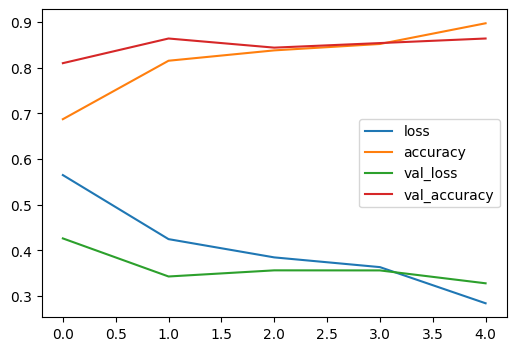

In [14]:
# lets plot the trainig curves
import pandas as pd
df_history = pd.DataFrame(history.history)
df_history.plot(figsize = (6, 4))

In [16]:
# Now lets plot the loss curve using my helper functions
# download the helper function
!wget https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py

--2023-08-27 07:50:06--  https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-27 07:50:06 (91.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



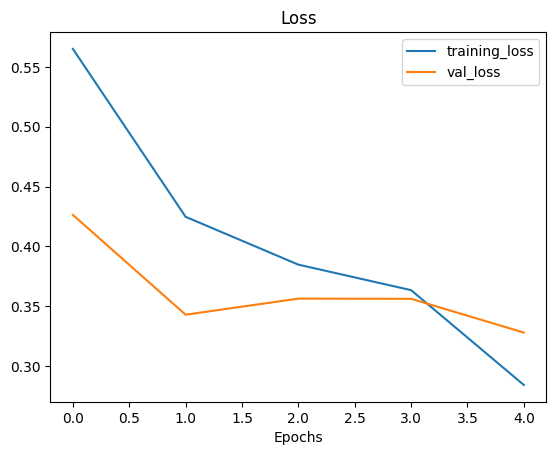

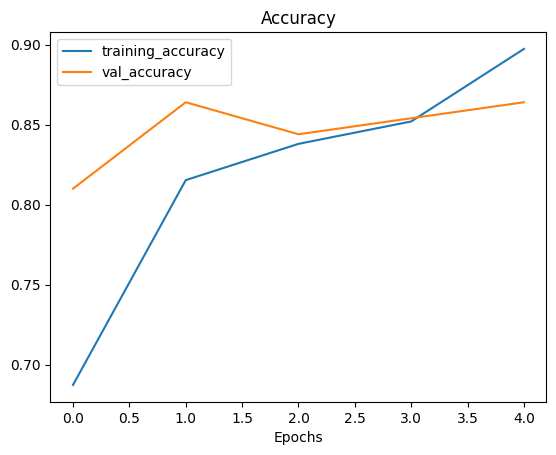

In [17]:
# let's plot the curve
from helper_functions import plot_loss_curves

plot_loss_curves(history)

look like our model is working well.

In [18]:
# now lets do predictions
# first we want to reshape and normalize the data to feed for get predictions

def load_and_prep_image(filename, image_shape=224):
  # read the image
  img = tf.io.read_file(filename)
  # Decode the read file in to a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size = [image_shape, image_shape])
  # rescale the image
  img = img/255.0
  return img

In [20]:
image = load_and_prep_image("/content/pizza_1.jpg") # You can give the file name or file dir
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.03529412, 0.03137255, 0.01568628],
        [0.03921569, 0.03529412, 0.01960784],
        [0.03697479, 0.03305322, 0.01736695],
        ...,
        [0.10138076, 0.08177292, 0.0700082 ],
        [0.1081232 , 0.08851536, 0.07675064],
        [0.10728305, 0.08767521, 0.0759105 ]],

       [[0.03781513, 0.03389356, 0.01820728],
        [0.03921569, 0.03529412, 0.01960784],
        [0.03613446, 0.03221289, 0.01652661],
        ...,
        [0.09063627, 0.07102842, 0.05926372],
        [0.11424579, 0.09463795, 0.08287324],
        [0.11074404, 0.09505776, 0.08329306]],

       [[0.0417367 , 0.03781513, 0.02212885],
        [0.0394958 , 0.03557423, 0.01988795],
        [0.03221289, 0.02829132, 0.01260504],
        ...,
        [0.09019608, 0.07124852, 0.05948381],
        [0.10056028, 0.084874  , 0.07310929],
        [0.10534217, 0.0896559 , 0.07789119]],

       ...,

       [[0.12953189, 0.11384562, 0.10208091],
        [0.11

In [23]:
# lets difine the class names
class_names = ["pzza","steak" ]

# lets difine the class names programaticaly
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [24]:
# get predictions
pred = model.predict(tf.expand_dims(image, axis=0)) # we feed data to our model as 4 dimentional bicouse it feed as a batches. so we want to increase our image dimention to 4
pred

1/1 [==============================] - 0s 249ms/step


array([[0.01291645]], dtype=float32)

In [25]:
# get the perdicted class name
pred_class = class_names[int(tf.round(pred[0])) ]
pred_class

'pizza'

In [26]:
# do the same thing we have done for using pred and plot function

def pred_and_plot(model, filename, class_names):
  # pere process the image
  img = load_and_prep_image(filename)
  # predict the image
  pred = model.predict(tf.expand_dims(img, axis=0))
  # get predicted calass name
  pred_class = class_names[int(tf.round(pred[0])) ]
  # plot the image and it perdicted class
  plt.figure(figsize=(3, 3))
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")

1/1 [==============================] - 0s 41ms/step


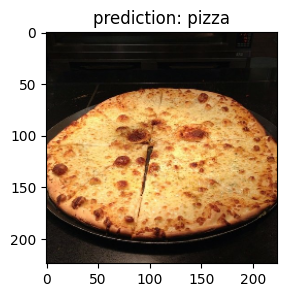

In [27]:
pred_and_plot(model = model, filename = "/content/pizza_1.jpg", class_names=class_names)

1/1 [==============================] - 0s 33ms/step


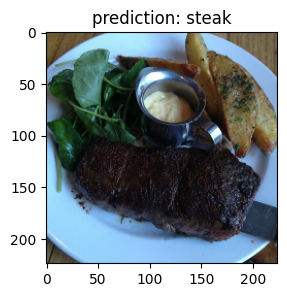

In [30]:
pred_and_plot(model = model, filename = "/content/Steak_1.jpg", class_names=class_names)

Look like our binary CNN model is working good. but we can improve this model with diffrent architecture.

End